In [2]:
import pyreadr
import glob
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import json
import dask
import geopandas as gp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

### 1. Create the graph of Cost of Carry from 2008 to 2017 (15th observation each month)+Graph of Ending Stocks            from 2008 to 2017 (montlhy data)
### 2. Plot together projected corn production and projected corn total use 2008-2017 (yearly averages)
### 3. Create a table with 2011-2012-2013 Backwarted Months

In [93]:
result = pyreadr.read_r('corn_first.rda') #Here I upload the daily setllement prices from the first deferred contract of Corn 1959-2018 R Studio file
print(result.keys()) 
df1 = result["data00"] 
df1

odict_keys(['data00'])


,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest
0,1959-07-01,118.00,118.20,117.50,117.70,541.0,7505.0
1,1959-07-02,117.60,118.00,117.10,117.60,1156.0,7897.0
2,1959-07-06,117.60,117.60,116.60,117.10,1495.0,8034.0
3,1959-07-07,117.10,117.70,117.00,117.10,1204.0,7977.0
4,1959-07-08,117.40,117.50,116.60,117.00,1244.0,7770.0
...,...,...,...,...,...,...,...
14835,2018-05-21,405.50,407.50,401.25,402.75,171591.0,810077.0
14836,2018-05-22,402.25,407.00,401.00,404.75,153128.0,811230.0
14837,2018-05-23,404.50,409.00,403.00,408.50,147575.0,797146.0
14838,2018-05-24,408.25,412.25,403.75,404.25,222820.0,789532.0


In [94]:
df1['Date2']=df1['Date'].astype(str) #I create a date column with integers value to be able to subset the df easily
df1['Date3']=df1['Date2'].str[0:4]+df1['Date2'].str[5:7]+df1['Date2'].str[8:]
df1['Date3']=df1['Date3'].astype(int)
del df1['Date2'] 

In [95]:
df1s= df1[df1['Date3']>=20080101] #Create a dataframe from January 1th 2008 to last observation
df1s.reset_index(drop=True, inplace=True)

In [96]:
result2 = pyreadr.read_r('corn_third.rda') #Here I upload the daily setllement prices from the third deferred contract of Corn 1959-2018 R Studio file
print(result2.keys())
df3 = result2["data00"] 
df3

odict_keys(['data00'])


,Date,Open,High,Low,Settle,Volume,Prev. Day Open Interest
0,1959-08-03,119.40,119.60,119.40,119.60,0.0,0.0
1,1959-08-04,119.40,119.60,119.40,119.50,15.0,10.0
2,1959-08-05,119.30,119.30,119.30,119.30,55.0,30.0
3,1959-08-06,118.40,118.60,118.20,118.60,0.0,30.0
4,1959-08-07,118.60,118.60,118.60,118.60,50.0,60.0
...,...,...,...,...,...,...,...
14813,2018-05-21,422.75,424.75,419.00,421.00,79451.0,497649.0
14814,2018-05-22,420.25,425.00,419.25,423.25,81650.0,508118.0
14815,2018-05-23,423.00,426.75,421.75,426.50,76383.0,514429.0
14816,2018-05-24,426.00,429.50,421.75,422.50,101308.0,518832.0


In [97]:
df3['Date2']=df3['Date'].astype(str)
df3['Date3']=df3['Date2'].str[0:4]+df3['Date2'].str[5:7]+df3['Date2'].str[8:]
df3['Date3']=df3['Date3'].astype(int)
del df3['Date2']

In [98]:
df3s= df3[df3['Date3']>=20080101]
df3s.reset_index(drop=True, inplace=True)

In [99]:
df1s['Settle_3']=df3s['Settle']
df1s['Cost_o_C']=df1s['Settle_3']-df1s['Settle'] # Create the Cost of Carry variable from the difference of the database Settlement Prices

<ipython-input-99-4a1a17de54a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Settle_3']=df3s['Settle']
<ipython-input-99-4a1a17de54a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Cost_o_C']=df1s['Settle_3']-df1s['Settle'] # Create the Cost of Carry variable from the difference of the database Settlement Prices


In [100]:
df1s['col']=df1s['Date'].astype(str) #Create some additional column on the original datatset, they would be useful later for the command groupby
df1s['Month']=df1s['col'].str[5:7] 
df1s['Day']=df1s['col'].str[8:]
df1s['M_D']=df1s['col'].str[0:4]+df1s['col'].str[5:7]
df1s['YMD']=df1s['col'].str[0:4]+df1s['col'].str[5:7]+df1s['col'].str[8:]
del df1s['col']
df1s['Month']=df1s['Month'].astype(int)
df1s['Day']=df1s['Day'].astype(int)

<ipython-input-100-1d37ce75595d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['col']=df1s['Date'].astype(str) #Create some additional column on the original datatset, they would be useful later for the command groupby
<ipython-input-100-1d37ce75595d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['Month']=df1s['col'].str[5:7]
<ipython-input-100-1d37ce75595d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [101]:
df1s['MD']=df1s['M_D'].astype(int)

<ipython-input-101-ad9ebc6f86f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1s['MD']=df1s['M_D'].astype(int)


In [102]:
print(df1s)

            Date    Open    High     Low  Settle    Volume  \
0     2008-01-02  460.00  469.50  460.00  462.50   17709.0   
1     2008-01-03  469.00  469.00  460.75  466.00   30304.0   
2     2008-01-04  462.50  469.00  459.00  466.75   26343.0   
3     2008-01-07  465.00  468.25  462.00  466.25   25031.0   
4     2008-01-08  471.00  479.75  471.00  478.75   18722.0   
...          ...     ...     ...     ...     ...       ...   
2616  2018-05-21  405.50  407.50  401.25  402.75  171591.0   
2617  2018-05-22  402.25  407.00  401.00  404.75  153128.0   
2618  2018-05-23  404.50  409.00  403.00  408.50  147575.0   
2619  2018-05-24  408.25  412.25  403.75  404.25  222820.0   
2620  2018-05-25  404.00  406.75  403.25  406.00  115699.0   

      Prev. Day Open Interest     Date3  Settle_3  Cost_o_C  Month  Day  \
0                    602039.0  20080102    483.00     20.50      1    2   
1                    608525.0  20080103    486.50     20.50      1    3   
2                    603837.0 

In [103]:
def take_15(rows): #use a function that groupby for different month and takes the 15th row, that correspond to the 
    return rows.iloc[14,:]


df_prices=df1s.groupby('MD').apply(take_15)

In [104]:
df_prices['Slope'] = np.where(df_prices.Cost_o_C >= 0, True, False)
df_prices['Slope']=df_prices['Slope'].astype(int)

In [105]:
print(df_prices)

              Date    Open    High     Low  Settle    Volume  \
MD                                                             
200801  2008-01-23  489.00  489.00  469.00  469.25   23365.0   
200802  2008-02-22  524.00  524.00  519.50  522.25   34753.0   
200803  2008-03-24  515.00  525.50  514.75  524.75  149989.0   
200804  2008-04-21  590.00  590.00  569.50  580.25   51173.0   
200805  2008-05-21  592.50  609.00  591.00  607.25  102239.0   
...            ...     ...     ...     ...     ...       ...   
201801  2018-01-23  351.75  352.00  349.50  351.25  191553.0   
201802  2018-02-22  365.50  367.00  364.25  366.75  194582.0   
201803  2018-03-21  375.00  375.75  373.75  375.00  140380.0   
201804  2018-04-20  381.25  381.75  376.25  376.50  135146.0   
201805  2018-05-21  405.50  407.50  401.25  402.75  171591.0   

        Prev. Day Open Interest     Date3  Settle_3  Cost_o_C  Month  Day  \
MD                                                                          
200801       

In [111]:
df_prices=df_prices[:120]

In [71]:
df = pd.read_csv('WASDE.csv') #read the Annula Inventory monthly projections data from the WASDE Announcements historical report data

In [72]:
df['ending stock'][1]=1438.0


<ipython-input-72-f3cf585d761e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ending stock'][1]=1438.0


In [78]:
df=df[:120]

<module 'matplotlib.pyplot' from 'C:\\Users\\Utente\\anaconda3\\envs\\ace592\\lib\\site-packages\\matplotlib\\pyplot.py'>


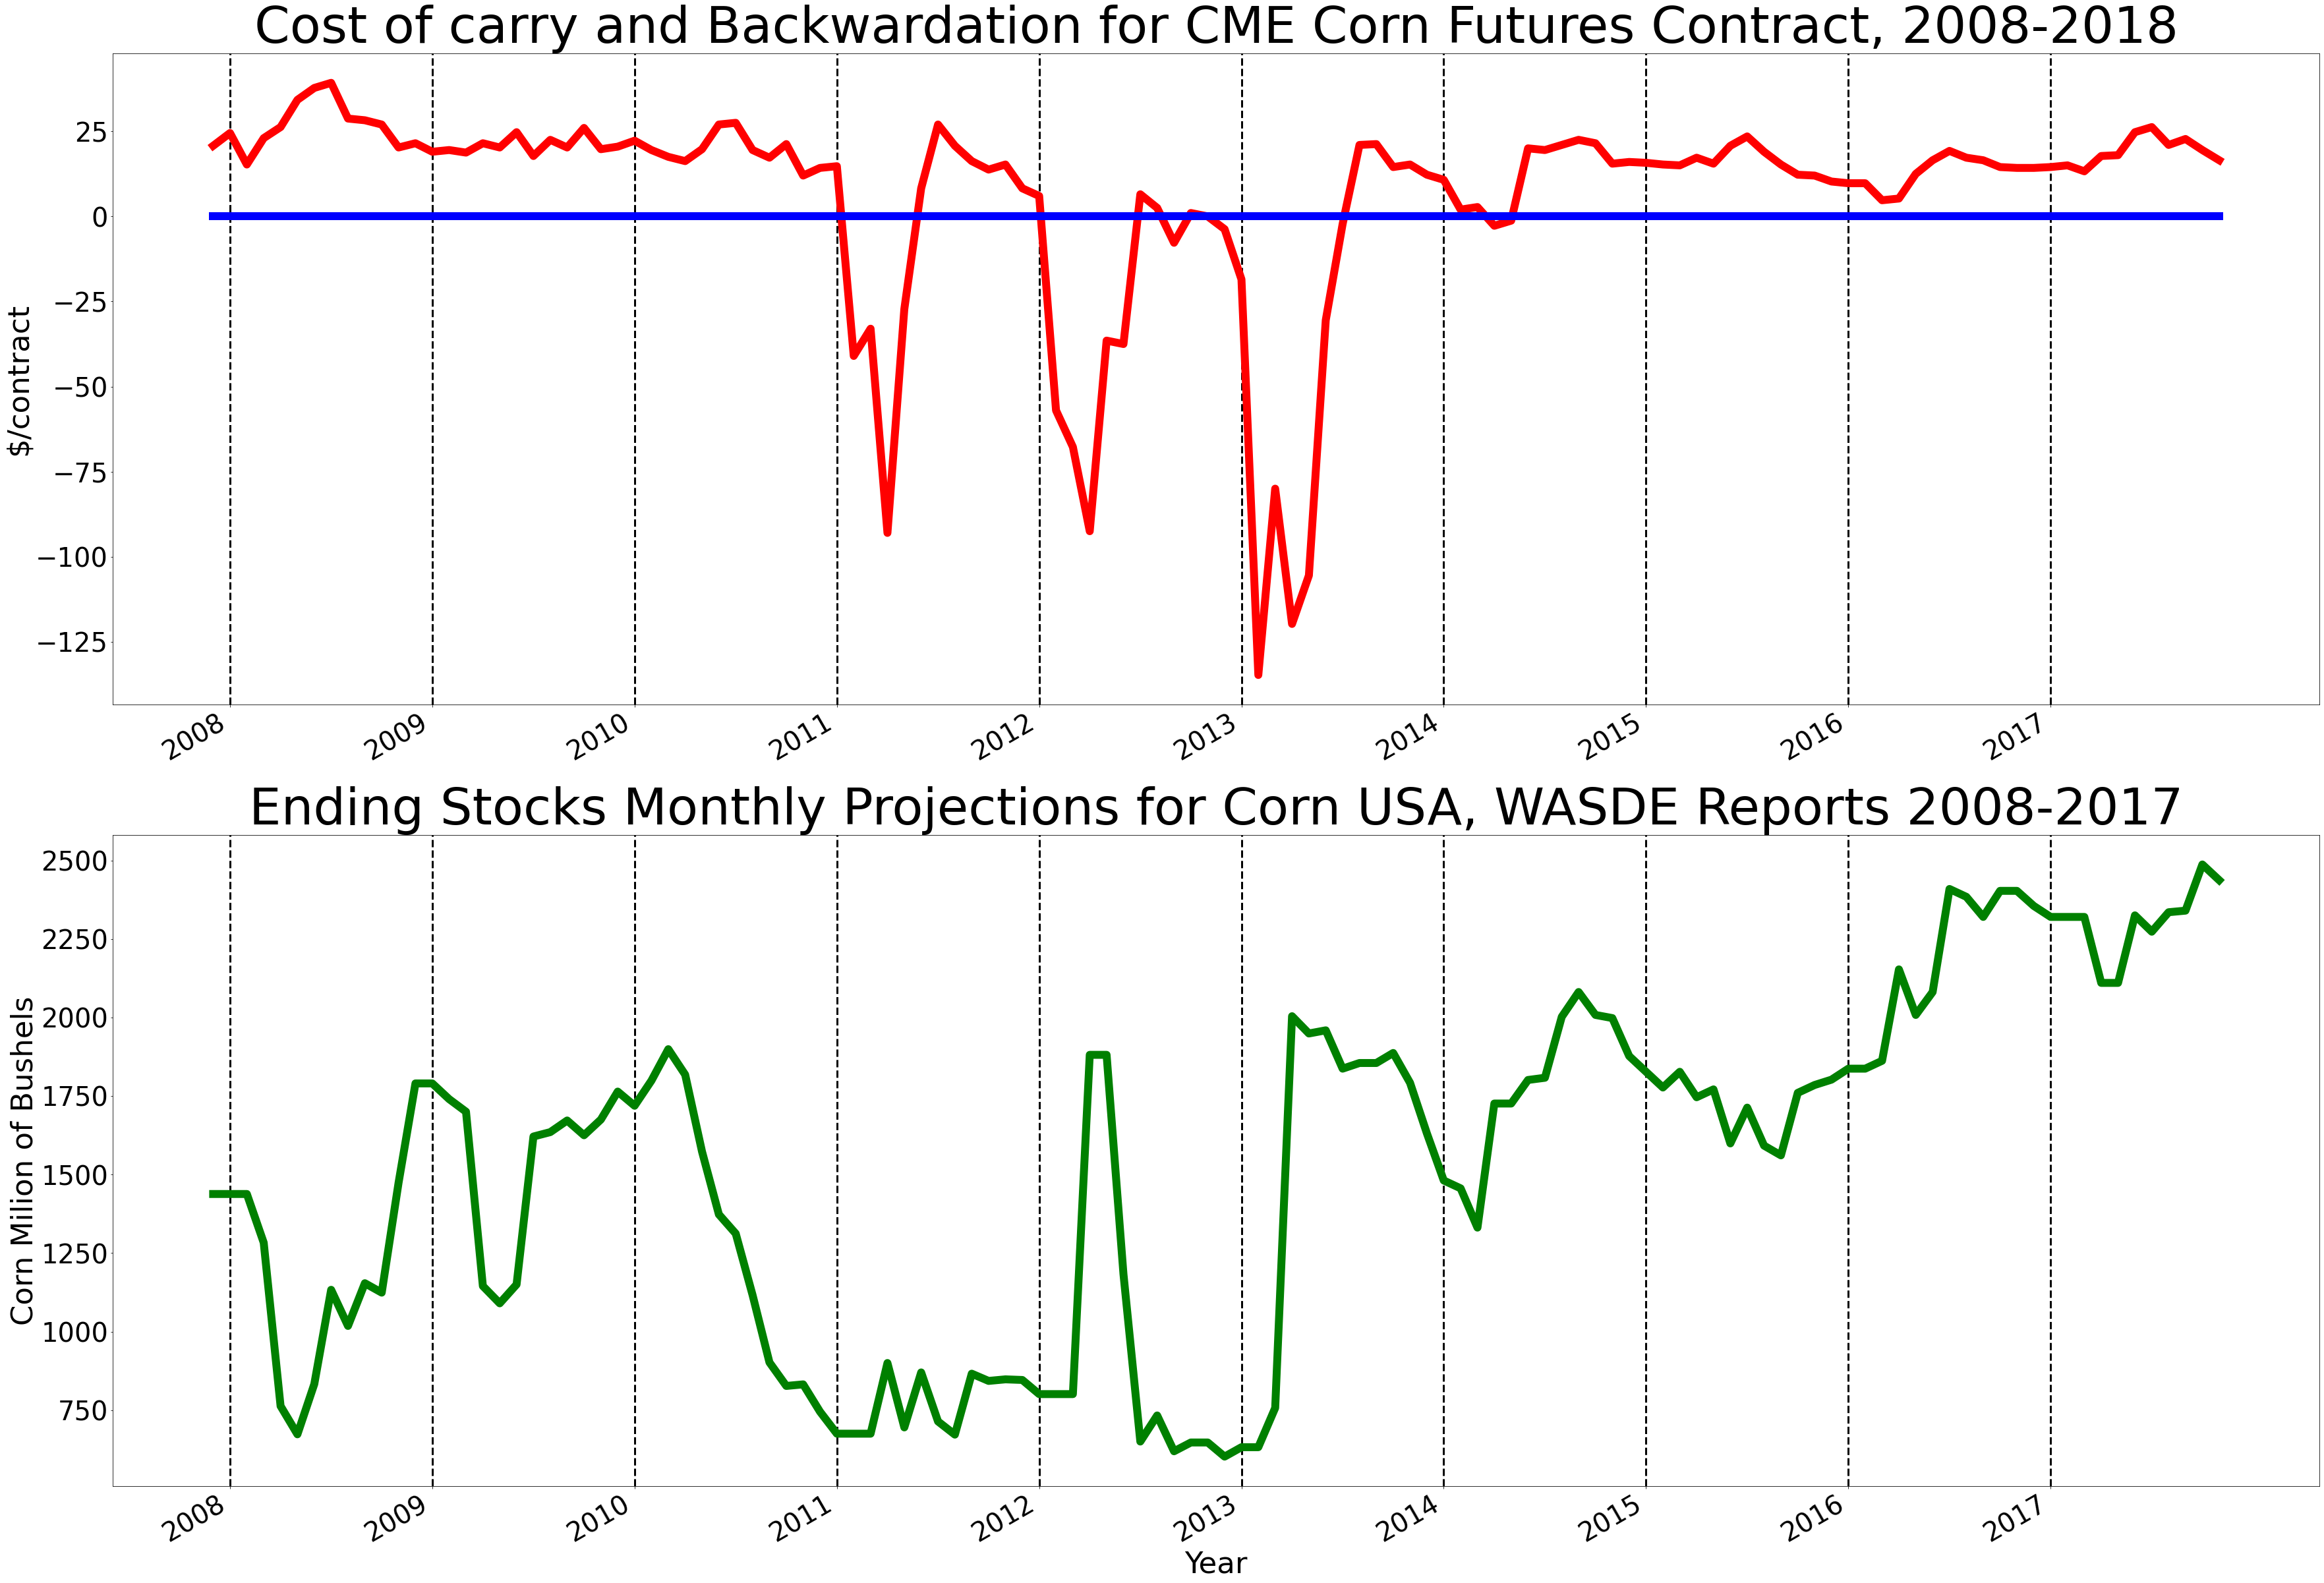

In [152]:
x = df.index #actual position
y1 = df_prices['Cost_o_C']
y2=[0]*120
y3 = df['ending stock']
labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']#position that I want to change
l=range(1,121)#actual position


fig, ax1= plt.subplots(2,1, figsize=(60,40))

ax1[1].plot(x, y3, 'g-',linewidth=12)

ax1[0].plot(x, y1, 'r-',linewidth=12)
ax1[0].plot(x, y2, 'b-',linewidth=12)

ax1[0].set_xticks(l[::12], minor=False)
ax1[0].set_xticklabels(labels, fontdict=None, minor=False,fontsize=40)
ax1[0].tick_params(axis='y', labelsize= 40)
plt.setp(ax1[0].get_xticklabels(), rotation=30, horizontalalignment='right')

ax1[1].set_xticks(l1[::12], minor=False)
ax1[1].set_xticklabels(labels1, fontdict=None, minor=False,fontsize=40)
ax1[1].tick_params(axis='y', labelsize= 40)
plt.setp(ax1[1].get_xticklabels(), rotation=30, horizontalalignment='right')

ax1[0].set_ylabel('$/contract',fontsize=45)

ax1[1].set_xlabel('Year',fontsize=45)
ax1[1].set_ylabel('Corn Milion of Bushels',fontsize=45)

ax1[0].set_title('Cost of carry and Backwardation for CME Corn Futures Contract, 2008-2018',fontsize=77)
ax1[1].set_title('Ending Stocks Monthly Projections for Corn USA, WASDE Reports 2008-2017',fontsize=77)

ax1[0].xaxis.grid(True,linewidth=3,color='black', linestyle='dashed')
ax1[1].xaxis.grid(True,linewidth=3,color='black', linestyle='dashed')

#plt.savefig("CRTvsBAS_noDec_daily.pdf")

#plt.gcf().autofmt_xdate()
print(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\Utente\\anaconda3\\envs\\ace592\\lib\\site-packages\\matplotlib\\pyplot.py'>


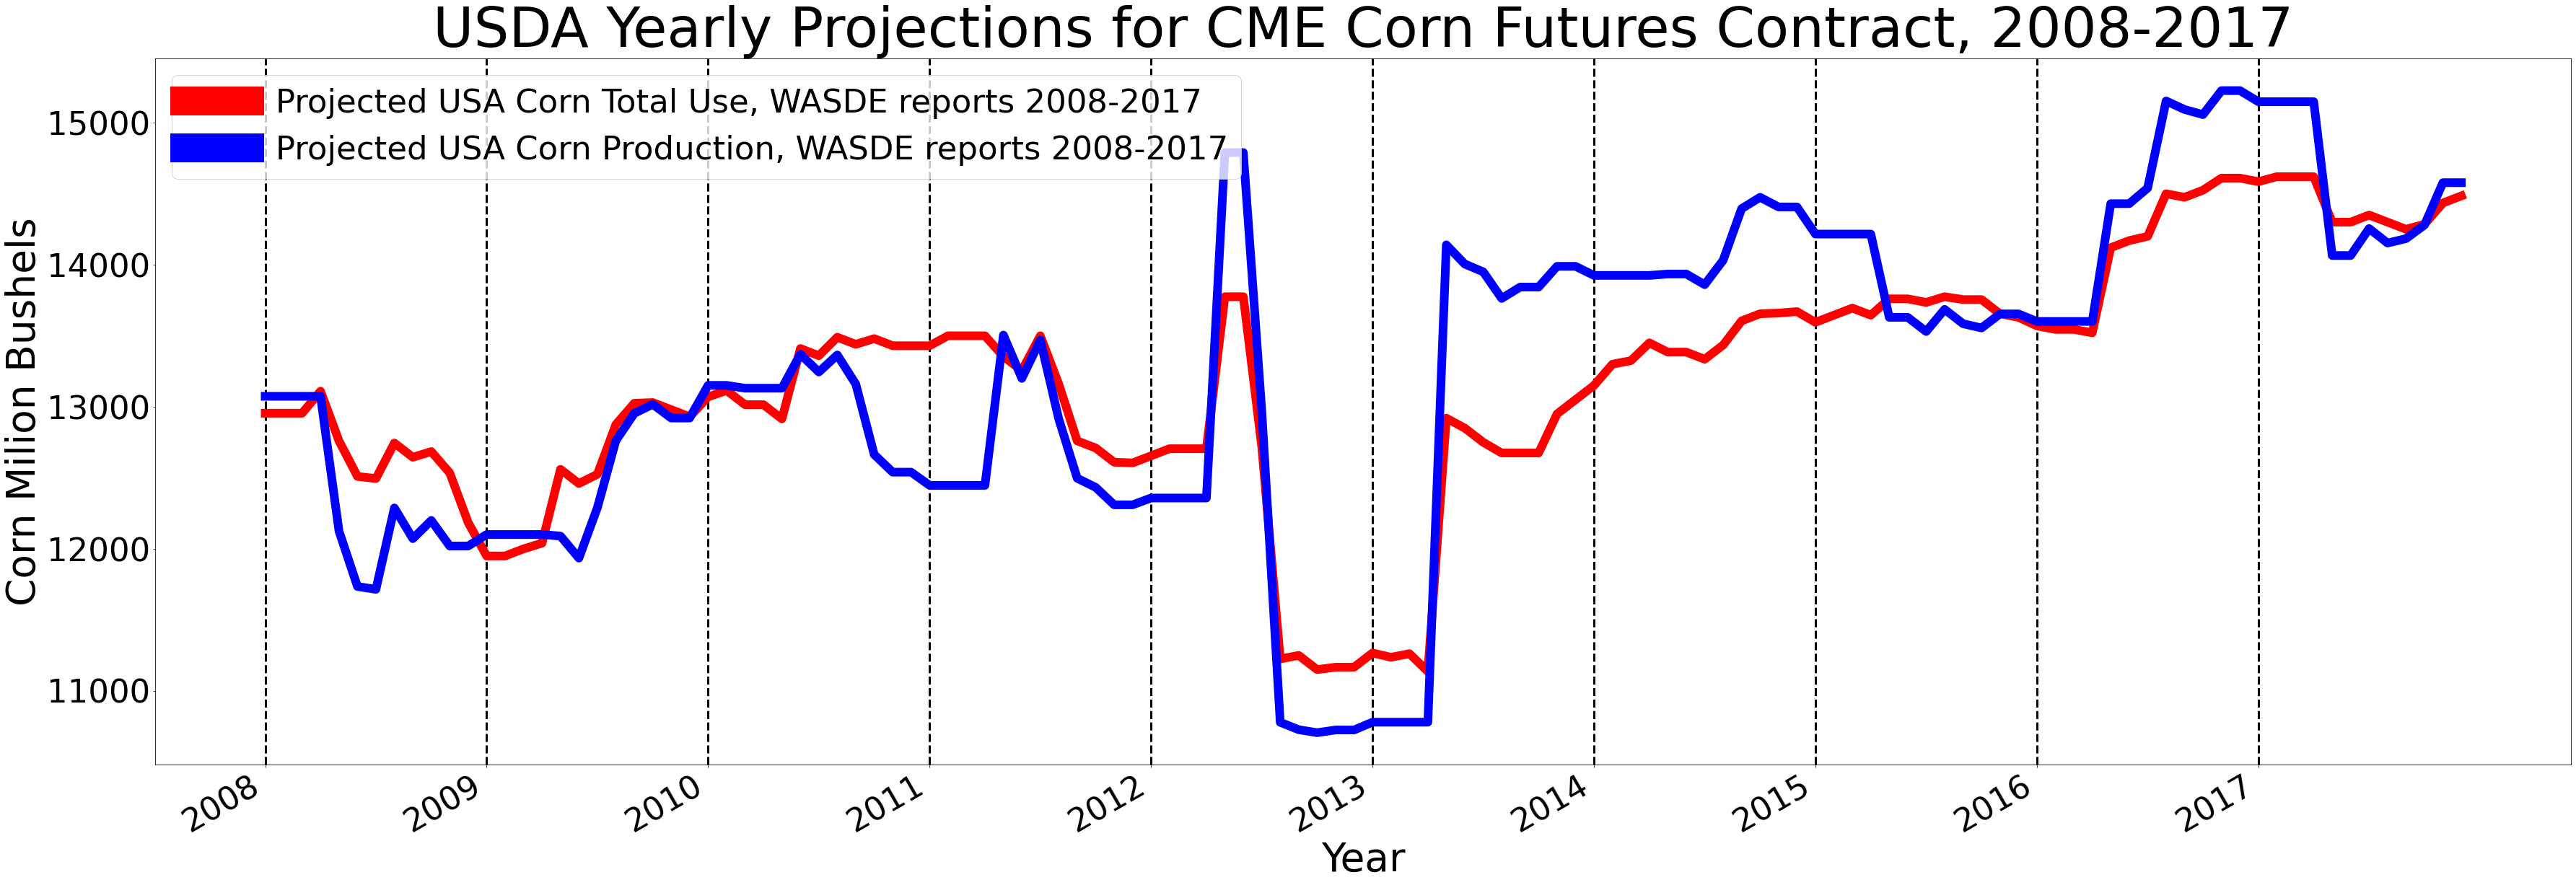

In [153]:
x = range(1,121) #actual position
y = df['total use']
y2= df['production']
labels=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017'] #position that I want to change
l=range(1,121) #actual position

fig, ax1= plt.subplots(figsize=(60,20))

ax1.plot(x, y, 'r-',linewidth=12)
ax1.plot(x,y2,'b-', linewidth=12)

ax1.set_xticks(l[::12], minor=False)
ax1.set_xticklabels(labels, fontdict=None, minor=False,fontsize=45)
ax1.tick_params(axis='y', labelsize= 45)
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')


ax1.set_xlabel('Year',fontsize=55)
ax1.set_ylabel('Corn Milion Bushels',fontsize=55)

ax1.plot([],[],color='r', label='Projected USA Corn Total Use, WASDE reports 2008-2017', linewidth=40)
ax1.plot([],[],color='b', label='Projected USA Corn Production, WASDE reports 2008-2017', linewidth=40)
ax1.legend(fontsize=45,loc="upper left")

ax1.xaxis.grid(True,linewidth=3,color='black', linestyle='dashed')

ax1.set_title('USDA Yearly Projections for CME Corn Futures Contract, 2008-2017',fontsize=77)
#plt.savefig("CRTvsBAS_noDec_daily.pdf")

plt.gcf().autofmt_xdate()
print(plt)

### Create a Table with backwarted month

In [157]:
df_prices.reset_index(drop=True, inplace=True)

In [176]:
df_bw=df[(df['year']==2011)+(df['year']==2012)+(df['year']==2013)]
df_bw.reset_index(drop=True, inplace=True)

C:\Users\Utente\anaconda3\envs\ace592\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
C:\Users\Utente\anaconda3\envs\ace592\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [177]:
df_prices['Year']=df_prices['Date'].astype(str)
df_prices['Year']=df_prices['Year'].str[:4]
df_prices['Year']=df_prices['Year'].astype(int)

<ipython-input-177-6a4a1bf4c138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Year']=df_prices['Date'].astype(str)
<ipython-input-177-6a4a1bf4c138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['Year']=df_prices['Year'].str[:4]
<ipython-input-177-6a4a1bf4c138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [178]:
df_bw_2=df_prices[(df_prices['Year']==2011)+(df_prices['Year']==2012)+(df_prices['Year']==2013)]
df_bw_2.reset_index(drop=True, inplace=True)

C:\Users\Utente\anaconda3\envs\ace592\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(
C:\Users\Utente\anaconda3\envs\ace592\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [180]:
df_bw['BackWardation']=df_bw_2['Slope']

<ipython-input-180-09f690931733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bw['BackWardation']=df_bw_2['Slope']


In [197]:
dfbw_2011=df_bw[:12]
dfbw_2011.reset_index(drop=True, inplace=True)
dfbw_2012=df_bw[12:24]
dfbw_2012.reset_index(drop=True, inplace=True)
dfbw_2013=df_bw[24:]
dfbw_2013.reset_index(drop=True, inplace=True)

In [191]:
df_BW=dfbw_2011

In [198]:
df_BW['2011-Bacwardation']=dfbw_2011['BackWardation']
df_BW['2012-Bacwardation']=dfbw_2012['BackWardation']
df_BW['2013-Bacwardation']=dfbw_2013['BackWardation']

<ipython-input-198-a95190b1e195>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BW['2011-Bacwardation']=dfbw_2011['BackWardation']
<ipython-input-198-a95190b1e195>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BW['2012-Bacwardation']=dfbw_2012['BackWardation']
<ipython-input-198-a95190b1e195>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [205]:
del df_BW['ending stock']

In [216]:
list=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df_BW['Month']=list
df_BW.set_index(df_BW['Month'],inplace=True,drop=True)

<ipython-input-216-d58ab21046a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BW['Month']=list


In [219]:
del df_BW['BackWardation']

In [223]:
print ('Bacwarted Months from 2011 to 2013 for Corn Futures Contracts')
print('')
print (df_BW)

Bacwarted Months from 2011 to 2013 for Corn Futures Contracts

       2011-Bacwardation  2012-Bacwardation  2013-Bacwardation
Month                                                         
Jan                    1                  1                  0
Feb                    1                  1                  0
Mar                    0                  0                  0
Apr                    0                  0                  0
May                    0                  0                  0
Jun                    0                  0                  0
Jul                    1                  0                  0
Aug                    1                  1                  0
Sep                    1                  1                  1
Oct                    1                  0                  1
Nov                    1                  1                  1
Dec                    1                  1                  1
